In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn 
import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer


In [103]:
#load files in
b_cal=pd.read_csv('BostonData/calendar.csv', parse_dates=['date'])
b_rev=pd.read_csv('BostonData/reviews.csv', parse_dates=['date'])
b_list=pd.read_csv('BostonData/listings-2.csv')
s_cal=pd.read_csv('SeattleData/calendar.csv', parse_dates=['date'])
s_rev=pd.read_csv('SeattleData/reviews.csv', parse_dates=['date'])
s_list=pd.read_csv('SeattleData/listings-2.csv')
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 15)

In [104]:
#broken in 2023 data

# # pd.get_dummies(b_list[['property_type',
# # 'room_type',
# # 'bed_type',
# # 'cancellation_policy']])
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# #column list broken in new version
# ohe_columns =  ['property_type',
# 'room_type',
# 'bed_type',
# 'cancellation_policy']
# enc = OneHotEncoder()

# def dummyEncode(df):
#         columnsToEncode = list(df.select_dtypes(include=['category','object']))
#         le = LabelEncoder()
#         for feature in columnsToEncode:
#             try:
#                 df[feature+'encoded'] = le.fit_transform(df[feature])
                
#             except:
#                 print('Error encoding '+feature)
#         return df
# new_df = b_list[ohe_columns]
# new_df=dummyEncode(new_df)
# #b_list.drop(ohe_columns,axis=1)
# b_list=pd.concat([b_list, new_df],axis=1)
# # transformed_df = pd.DataFrame(
# #     le.fit_transform(b_list),
# #     index = b_list.index)
# # transformed_df = pd.concat([X_train.drop(ohe_columns,axis=1),transformed_df],axis=1)
# # display(transformed_df)

# # print(enc.fit_transform(b_list))
# # b_list.drop(['property_type',
# # 'room_type',
# # 'bed_type',
# # 'cancellation_policy'])\
# new_df = s_list[ohe_columns]
# new_df=dummyEncode(new_df)
# #s_list.drop(ohe_columns,axis=1)
# s_list=pd.concat([s_list, new_df],axis=1)

In [105]:
#turn available variable into a bool
b_cal['avail'] = b_cal.available.apply(lambda x: True if x=='t' else False)
b_cal.tail()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,avail
1472040,980483606576205347,2024-09-10,f,$199.00,$199.00,1,365,False
1472041,980483606576205347,2024-09-11,f,$199.00,$199.00,1,365,False
1472042,980483606576205347,2024-09-12,f,$199.00,$199.00,1,365,False
1472043,980483606576205347,2024-09-13,f,$199.00,$199.00,1,365,False
1472044,980483606576205347,2024-09-14,f,$199.00,$199.00,1,365,False


In [106]:
#look at column types
b_list.columns.to_list()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30

In [107]:
#set variables to correct types (t/f to bool, $ to floats, etc)
s_cal['avail'] = s_cal.available.apply(lambda x: True if x=='t' else False)

s_cal.price = s_cal.price.str.replace('$','').str.replace(',','').astype(float)#Cast to float
b_cal.price = b_cal.price.str.replace('$','').str.replace(',','').astype(float)#Cast to float
s_list.price = s_list.price.str.replace('$','').str.replace(',','').astype(float)#Cast to float
b_list.price = b_list.price.str.replace('$','').str.replace(',','').astype(float)#Cast to float
# s_list.security_deposit = s_list.security_deposit.str.replace('$','').str.replace(',','').astype(float)#Cast to float
# b_list.security_deposit = b_list.security_deposit.str.replace('$','').str.replace(',','').astype(float)#Cast to float

# s_list.cleaning_fee=s_list.cleaning_fee.fillna(0)
# b_list.cleaning_fee=b_list.cleaning_fee.fillna(0)
# s_list.security_deposit=s_list.security_deposit.fillna(0)
# b_list.security_deposit=b_list.security_deposit.fillna(0)
s_list.host_is_superhost = s_list.host_is_superhost.apply(lambda x: True if x=='t' else False)
b_list.host_is_superhost = b_list.host_is_superhost.apply(lambda x: True if x=='t' else False)
s_list.host_response_rate = s_list.host_response_rate.str.replace('%','').astype(float)
b_list.host_response_rate = b_list.host_response_rate.str.replace('%','').astype(float)
s_list.host_has_profile_pic = s_list.host_has_profile_pic.apply(lambda x: True if x=='t' else False)
b_list.host_has_profile_pic = b_list.host_has_profile_pic.apply(lambda x: True if x=='t' else False)
s_list.host_identity_verified = s_list.host_identity_verified.apply(lambda x: True if x=='t' else False)
b_list.host_identity_verified = b_list.host_identity_verified.apply(lambda x: True if x=='t' else False)
s_list.instant_bookable = s_list.instant_bookable.apply(lambda x: True if x=='t' else False)
b_list.instant_bookable = b_list.instant_bookable.apply(lambda x: True if x=='t' else False)
# s_list.require_guest_phone_verification = s_list.require_guest_phone_verification.apply(lambda x: True if x=='t' else False)
# b_list.require_guest_phone_verification = b_list.require_guest_phone_verification.apply(lambda x: True if x=='t' else False)
# s_list.require_guest_profile_picture = s_list.require_guest_profile_picture.apply(lambda x: True if x=='t' else False)
# b_list.require_guest_profile_picture = b_list.require_guest_profile_picture.apply(lambda x: True if x=='t' else False)
 

/var/folders/dc/11dz__fx4n117dfk45w48w300000gn/T/ipykernel_25559/1442169988.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  s_cal.price = s_cal.price.str.replace('$','').str.replace(',','').astype(float)#Cast to float
/var/folders/dc/11dz__fx4n117dfk45w48w300000gn/T/ipykernel_25559/1442169988.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  b_cal.price = b_cal.price.str.replace('$','').str.replace(',','').astype(float)#Cast to float
/var/folders/dc/11dz__fx4n117dfk45w48w300000gn/T/ipykernel_25559/1442169988.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be 

In [108]:
b_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...


In [8]:
b_rev.dtypes

listing_id                int64
id                        int64
date             datetime64[ns]
reviewer_id               int64
reviewer_name            object
comments                 object
dtype: object

In [9]:
b_list.head()
b_list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

<AxesSubplot:xlabel='review_scores_rating', ylabel='Count'>

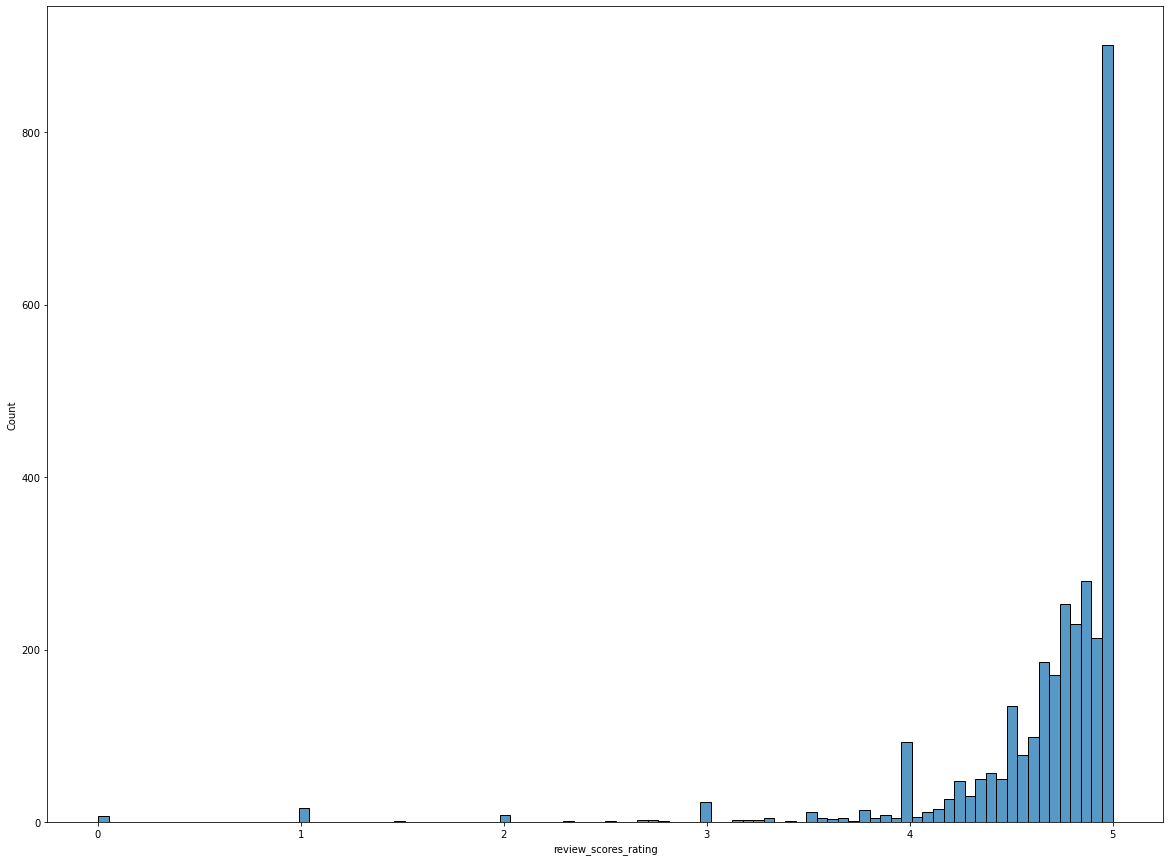

In [10]:
#look at boston scores
sns.histplot(data=b_list.review_scores_rating)

<AxesSubplot:xlabel='review_scores_rating', ylabel='Count'>

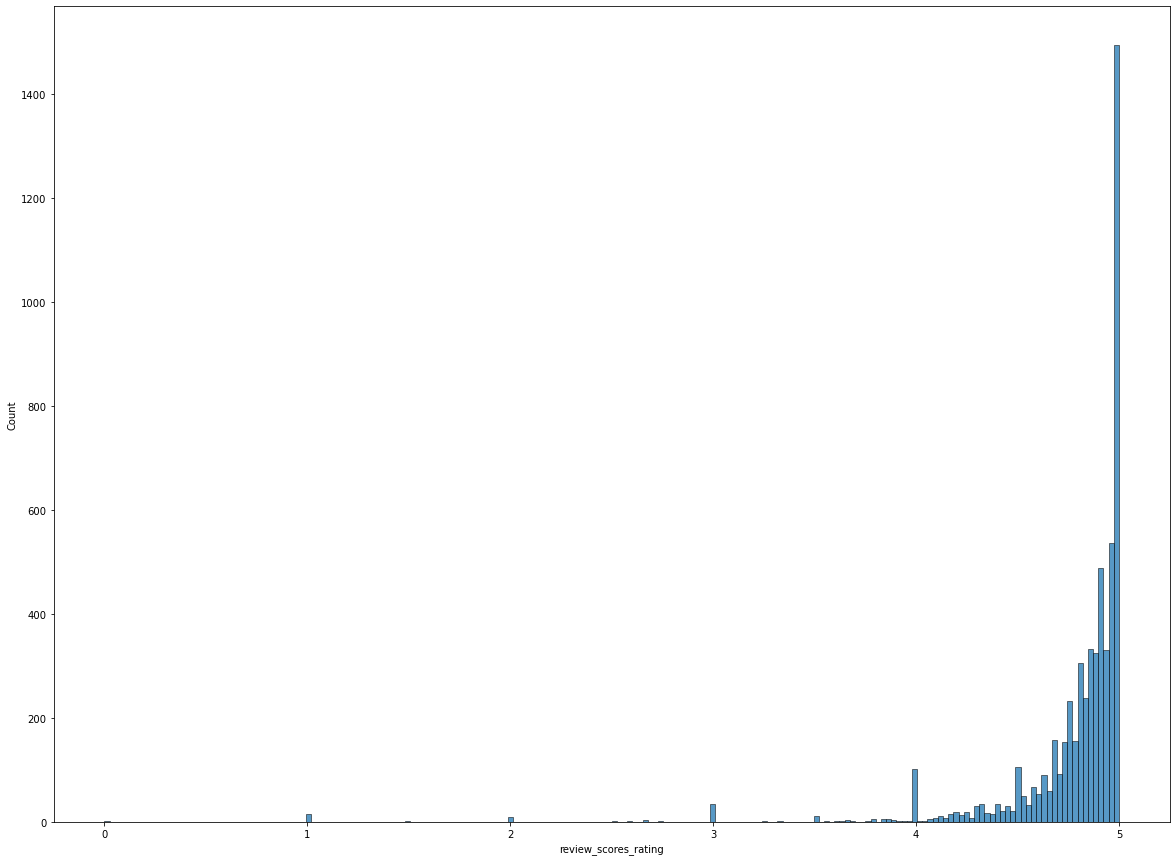

In [11]:
#look at seattle scores
sns.histplot(data=s_list.review_scores_rating)

<AxesSubplot:xlabel='date', ylabel='avail'>

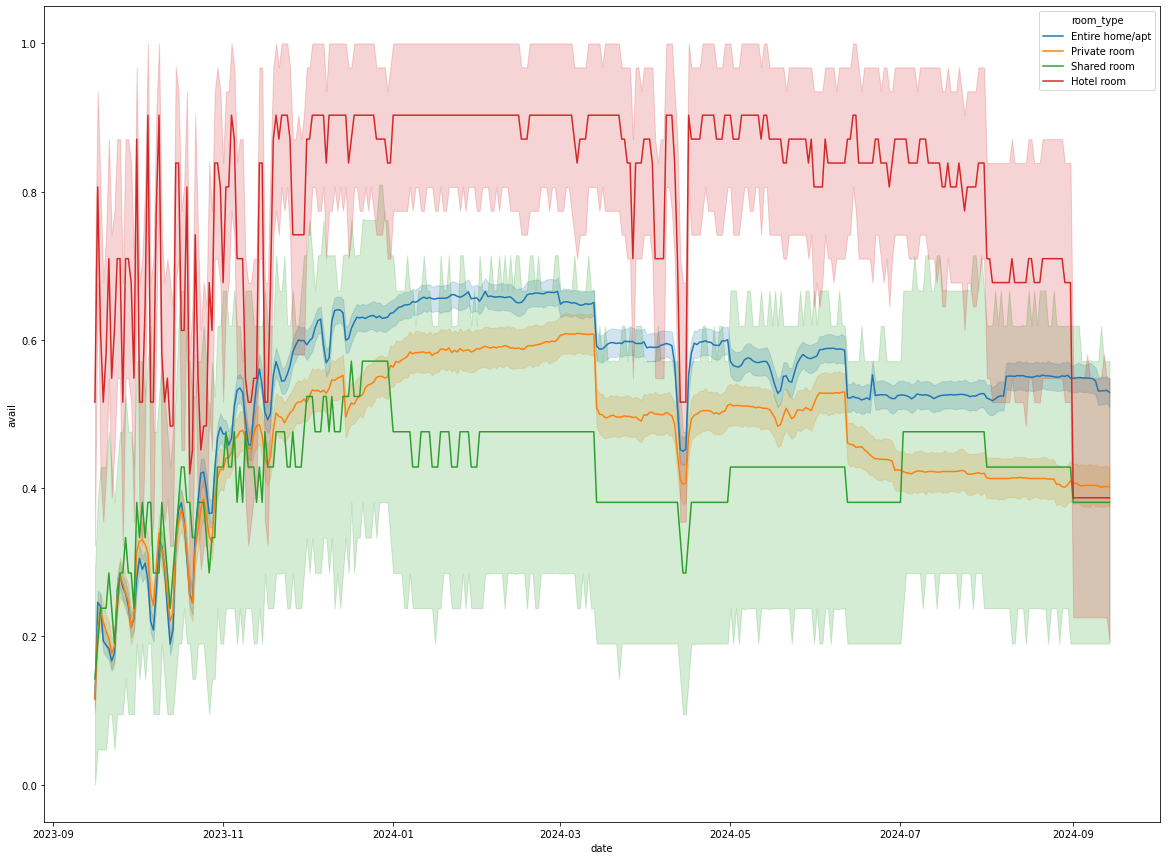

In [17]:
#plots listing availability by room type
b_cal['id']=b_cal.listing_id
mdf = pd.DataFrame(b_list[['id','room_type']].groupby('id',as_index=False).min())
# mdf.columns = ['id','room_type','drop']
# mdf= mdf.drop('drop',axis=1)
b_cal2 = b_cal.merge(mdf,on='id', how='left',suffixes=('_r','_l'))
#b_cal2.head()
sns.lineplot(data=b_cal2, x='date', y='avail', hue='room_type')
#sns.lineplot(data=b_cal, x='date',y='price')

<AxesSubplot:xlabel='date', ylabel='avail'>

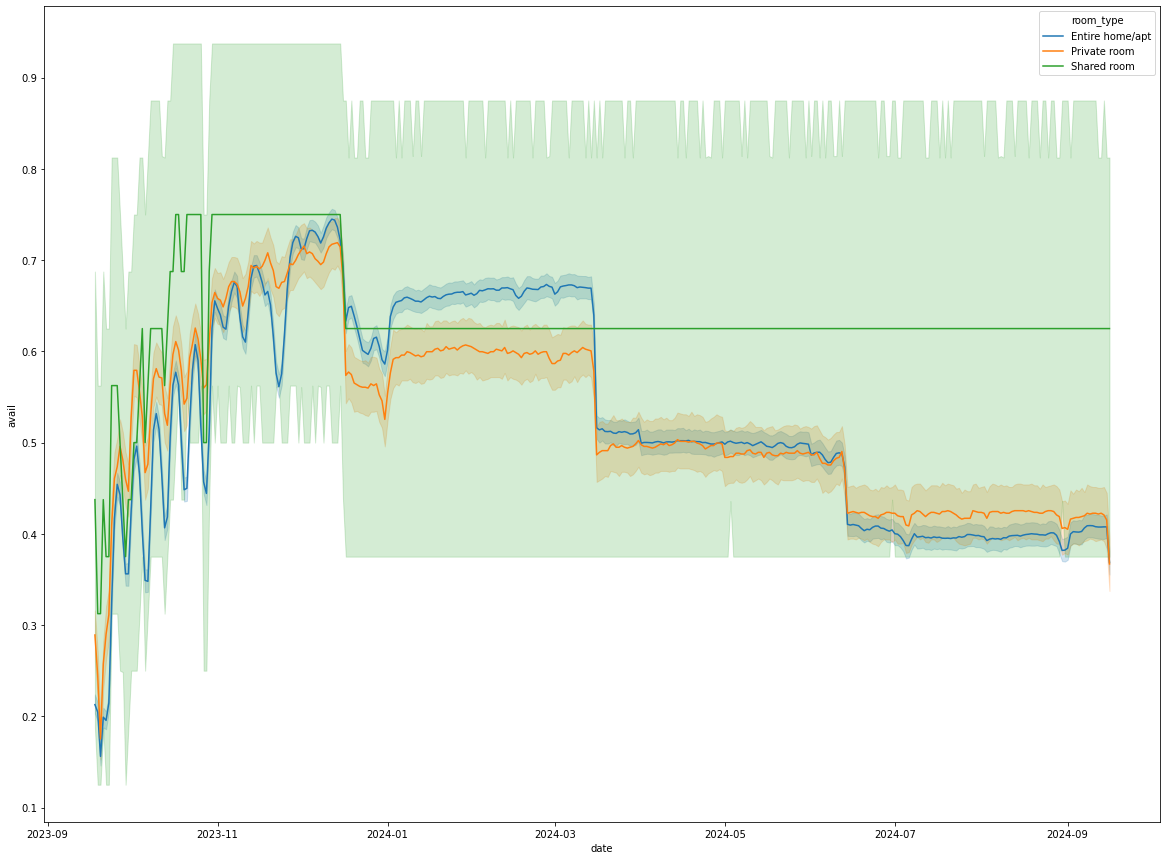

In [18]:
#plots listing availability by room type

s_cal['id']=s_cal.listing_id
mdf = pd.DataFrame(s_list[['id','room_type']].groupby('id',as_index=False).min())
# mdf.columns = ['id','room_type','drop']
# mdf= mdf.drop('drop',axis=1)
s_cal2 = s_cal.merge(mdf,on='id', how='left',suffixes=('_r','_l'))
#b_cal2.head()
sns.lineplot(data=s_cal2, x='date', y='avail', hue='room_type')
#sns.lineplot(data=b_cal, x='date',y='price')

<AxesSubplot:xlabel='date', ylabel='avail'>

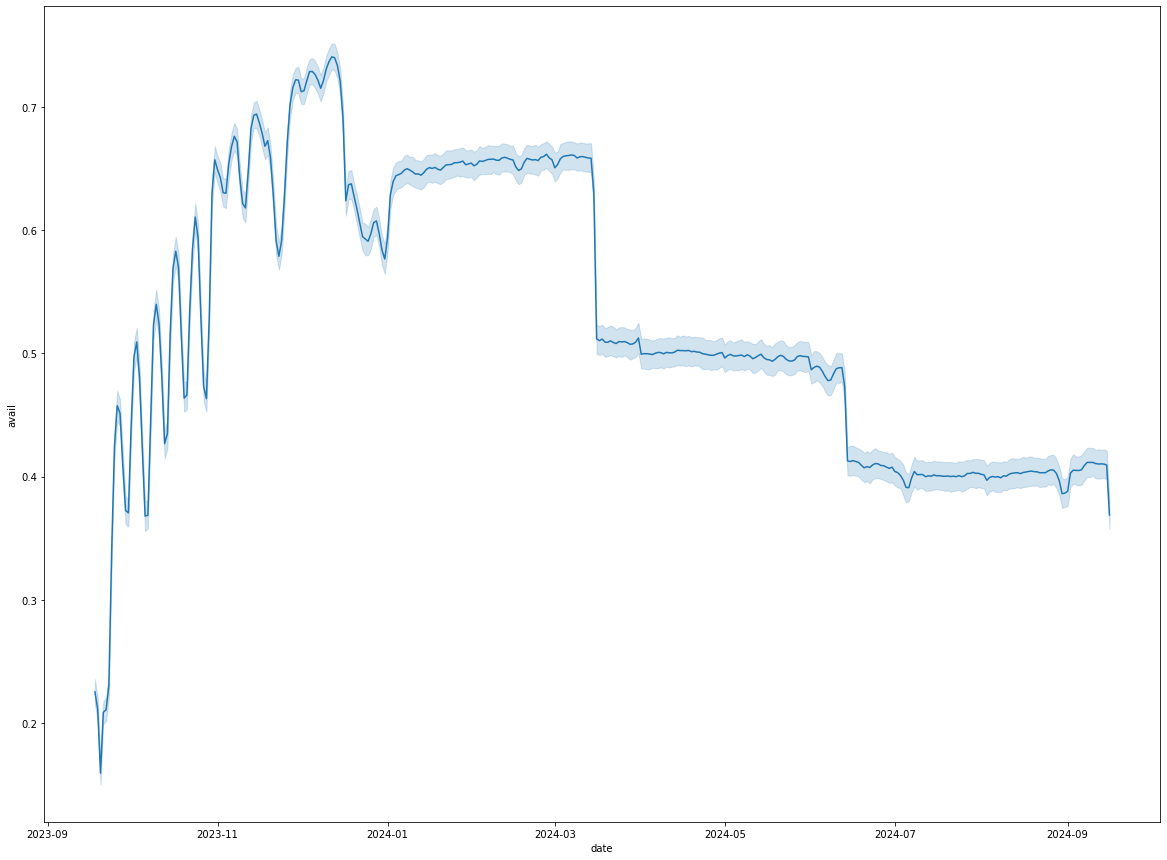

In [14]:
#plots total seattle availability
sns.lineplot(data=s_cal, x='date', y='avail')
#sns.lineplot(data=s_cal, x='date',y='price')

In [ ]:
#Get Descriptive stats

In [15]:
b_list.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.033000e+03,4.033000e+03,4.033000e+03,4033.000000,4033.000000,0.0,4033.000000,4033.000000,4033.000000,0.0,...,3051.000000,3049.000000,3051.000000,3049.000000,3049.000000,4033.000000,4033.000000,4033.000000,4033.000000,3058.000000
mean,3.116715e+17,2.023092e+13,1.547305e+08,419.277709,609.850484,NaN,42.337649,-71.082417,3.221175,NaN,...,4.716411,4.814008,4.801380,4.742584,4.567967,48.501116,38.610464,9.780808,0.023804,1.775327
std,3.903367e+17,9.298028e-01,1.505714e+08,1246.375775,1603.306480,NaN,0.026728,0.032826,2.240650,NaN,...,0.436278,0.418615,0.416989,0.380658,0.511926,91.864389,89.193897,33.580867,0.187477,2.028323
min,3.781000e+03,2.023092e+13,4.804000e+03,1.000000,1.000000,NaN,42.235300,-71.173442,1.000000,NaN,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.653275e+07,2.023092e+13,2.234822e+07,2.000000,3.000000,NaN,42.322410,-71.099710,2.000000,NaN,...,4.640000,4.810000,4.800000,4.660000,4.470000,2.000000,1.000000,0.000000,0.000000,0.270000
50%,4.975241e+07,2.023092e+13,1.074344e+08,12.000000,16.000000,NaN,42.344570,-71.074870,2.000000,NaN,...,4.850000,4.940000,4.930000,4.860000,4.680000,8.000000,3.000000,0.000000,0.000000,1.010000
75%,7.296586e+17,2.023092e+13,2.680891e+08,73.000000,131.000000,NaN,42.354294,-71.060810,4.000000,NaN,...,4.990000,5.000000,5.000000,5.000000,4.850000,44.000000,28.000000,3.000000,0.000000,2.547500
max,9.804836e+17,2.023092e+13,5.316613e+08,4581.000000,5861.000000,NaN,42.392280,-70.996000,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,330.000000,330.000000,166.000000,4.000000,17.440000


In [16]:
s_list.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.823000e+03,6.823000e+03,6.823000e+03,6823.000000,6823.000000,6823.000000,6823.000000,6823.000000,0.0,5217.000000,...,5832.000000,5832.000000,5832.000000,5832.000000,5831.000000,6823.000000,6823.000000,6823.000000,6823.000000,5832.000000
mean,3.525649e+17,2.023092e+13,1.499893e+08,316.443207,416.883336,47.626627,-122.334067,4.020079,NaN,1.937129,...,4.804393,4.871269,4.865501,4.824803,4.696903,31.654258,29.568811,2.074894,0.010553,2.316691
std,3.974132e+17,1.800913e+00,1.653001e+08,1064.042903,1363.681416,0.049361,0.033188,2.566393,NaN,1.136013,...,0.339507,0.298427,0.342210,0.281951,0.385279,85.310449,85.372762,6.941042,0.179269,2.066707
min,6.606000e+03,2.023092e+13,2.536000e+03,1.000000,1.000000,47.495874,-122.419050,1.000000,NaN,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.790909e+07,2.023092e+13,1.821758e+07,1.000000,1.000000,47.602151,-122.356520,2.000000,NaN,1.000000,...,4.760000,4.870000,4.880000,4.790000,4.640000,1.000000,1.000000,0.000000,0.000000,0.640000
50%,5.267547e+07,2.023092e+13,8.033375e+07,3.000000,4.000000,47.623272,-122.332794,4.000000,NaN,2.000000,...,4.910000,4.960000,4.960000,4.900000,4.800000,2.000000,1.000000,0.000000,0.000000,1.850000
75%,7.538476e+17,2.023092e+13,2.415841e+08,19.000000,28.000000,47.664395,-122.310665,5.000000,NaN,2.000000,...,4.990000,5.000000,5.000000,4.970000,4.900000,13.000000,8.000000,0.000000,0.000000,3.440000
max,9.820239e+17,2.023092e+13,5.360771e+08,4586.000000,5861.000000,47.734010,-122.240870,16.000000,NaN,13.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,374.000000,374.000000,49.000000,4.000000,20.790000


<AxesSubplot:xlabel='date', ylabel='price'>

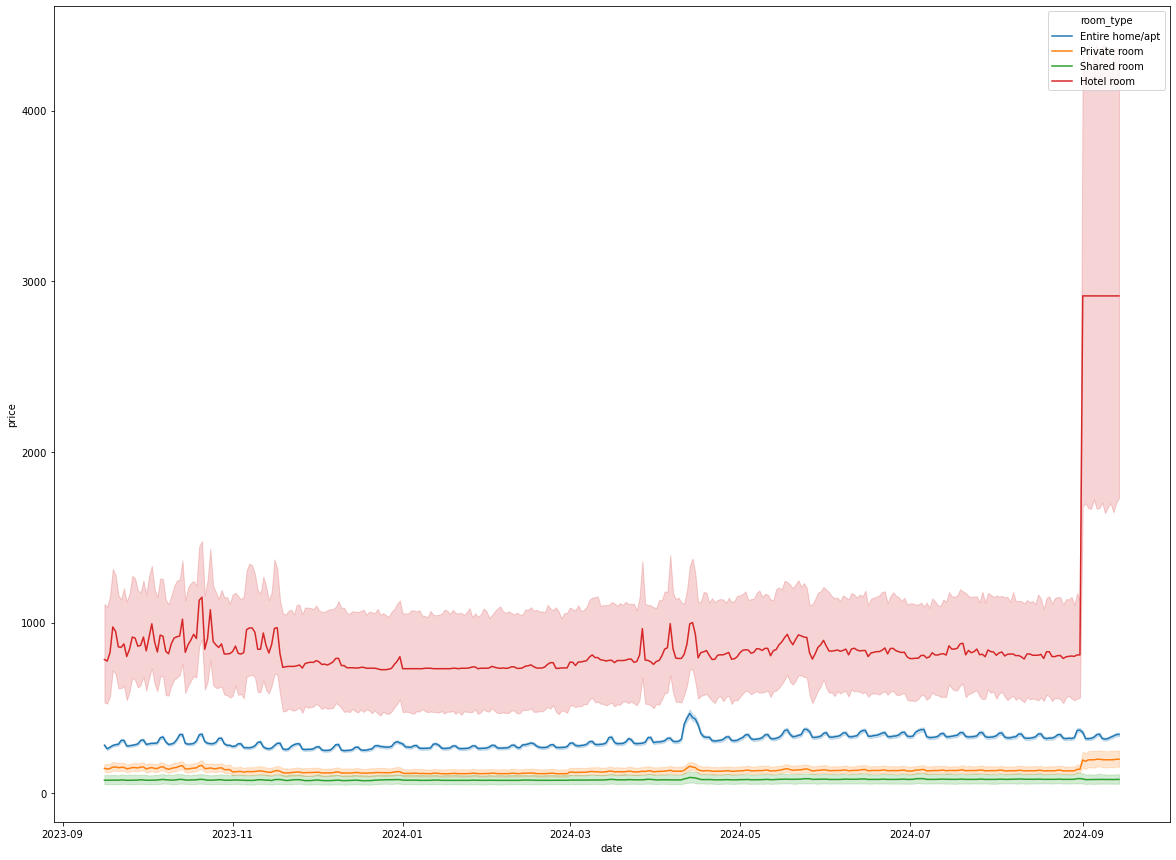

In [21]:
#plots price by room type
#sns.lineplot(data=b_cal, x='date',y='price')
b_cal['id']=b_cal.listing_id
mdf = pd.DataFrame(b_list[['id','room_type']].groupby('id',as_index=False).min())
# mdf.columns = ['id','room_type','drop']
# mdf= mdf.drop('drop',axis=1)
b_cal2 = b_cal.merge(mdf,on='id', how='left',suffixes=('_r','_l'))
#b_cal2.head()
sns.lineplot(data=b_cal2, x='date', y='price', hue='room_type')

<AxesSubplot:xlabel='date', ylabel='price'>

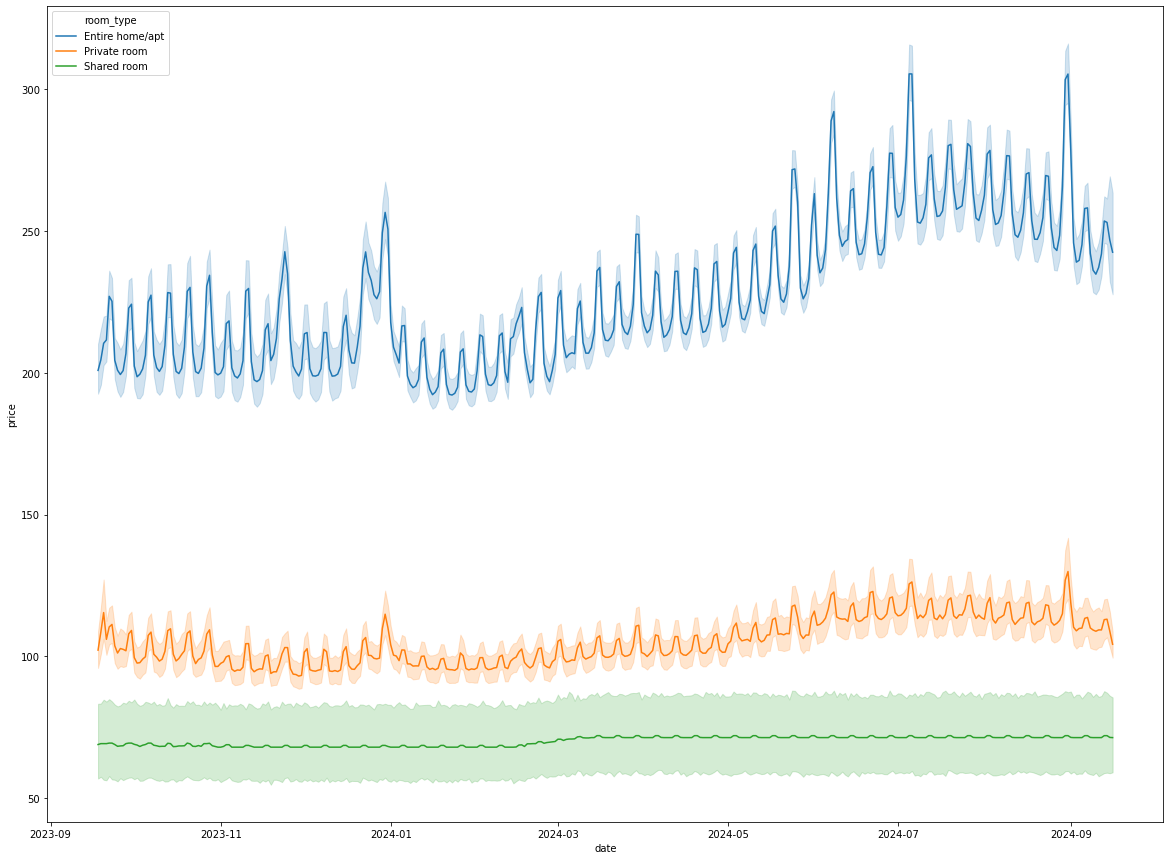

In [22]:
#plots price by room type

#sns.lineplot(data=b_cal, x='date',y='price')
s_cal['id']=s_cal.listing_id
mdf = pd.DataFrame(s_list[['id','room_type']].groupby('id',as_index=False).min())
# mdf.columns = ['id','room_type','drop']
# mdf= mdf.drop('drop',axis=1)
s_cal2 = s_cal.merge(mdf,on='id', how='left',suffixes=('_r','_l'))
#b_cal2.head()
sns.lineplot(data=s_cal2, x='date', y='price', hue='room_type')

<AxesSubplot:xlabel='weekday', ylabel='price'>

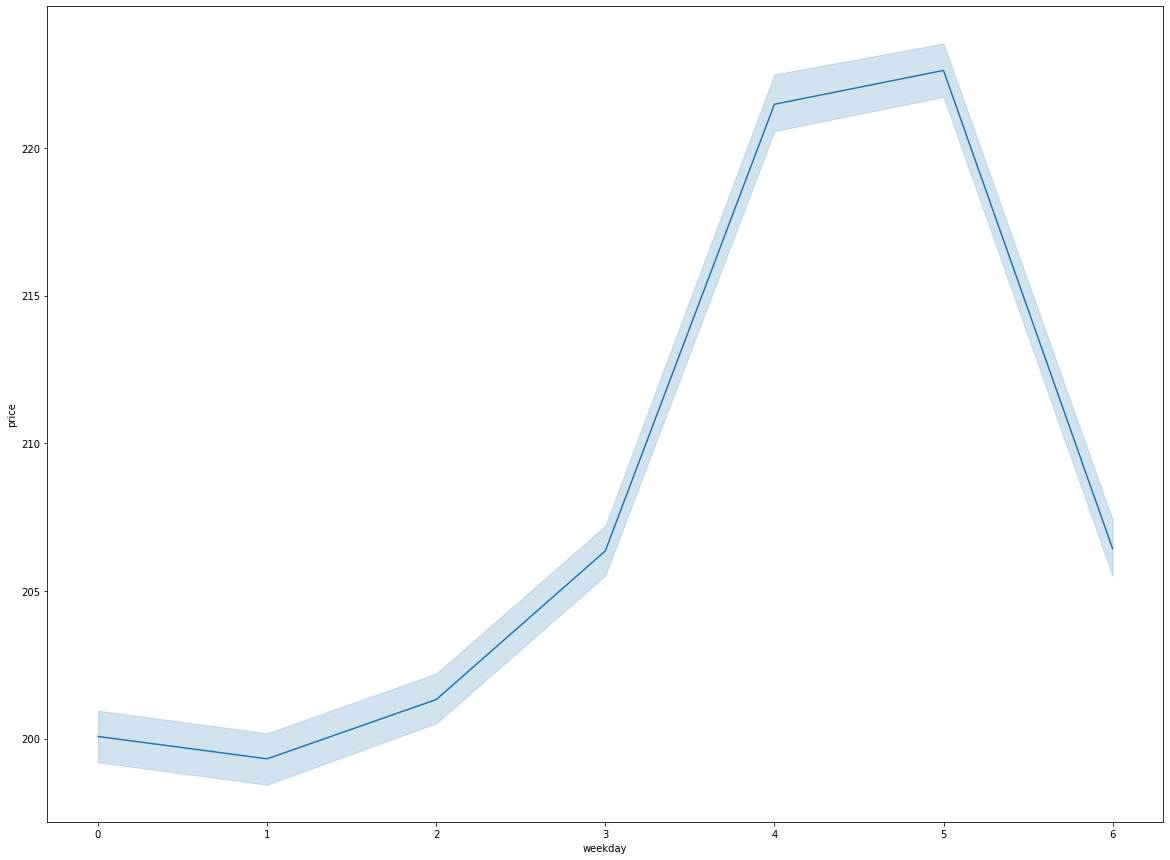

In [23]:
#creates weekday varible, plots price vs weekday
s_cal['weekday'] = s_cal['date'].apply(lambda x: x.weekday())#s_cal['date'].datetime.dayofweek
sns.lineplot(data=s_cal, x='weekday',y='price')

<AxesSubplot:xlabel='weekday', ylabel='avail'>

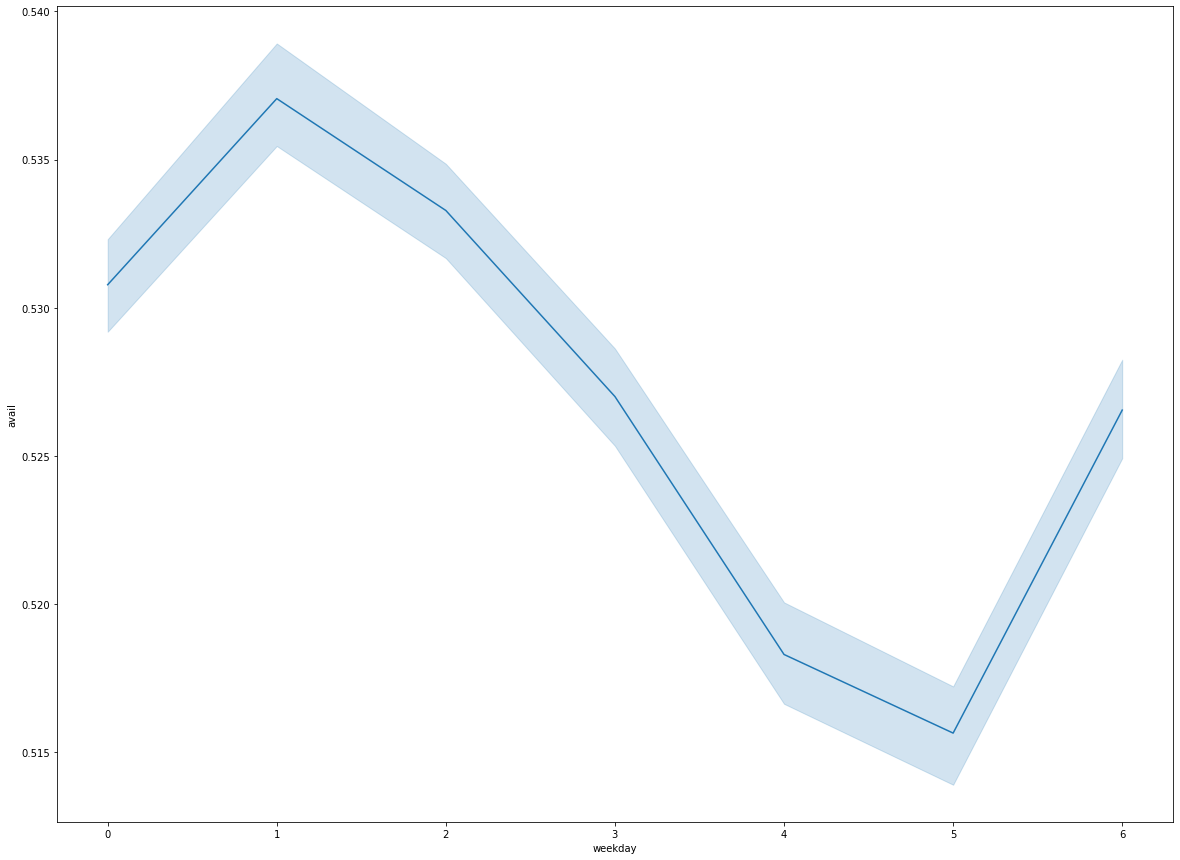

In [24]:

#plots availability vs weekday
sns.lineplot(data=s_cal, x='weekday',y='avail')

<AxesSubplot:xlabel='weekday', ylabel='price'>

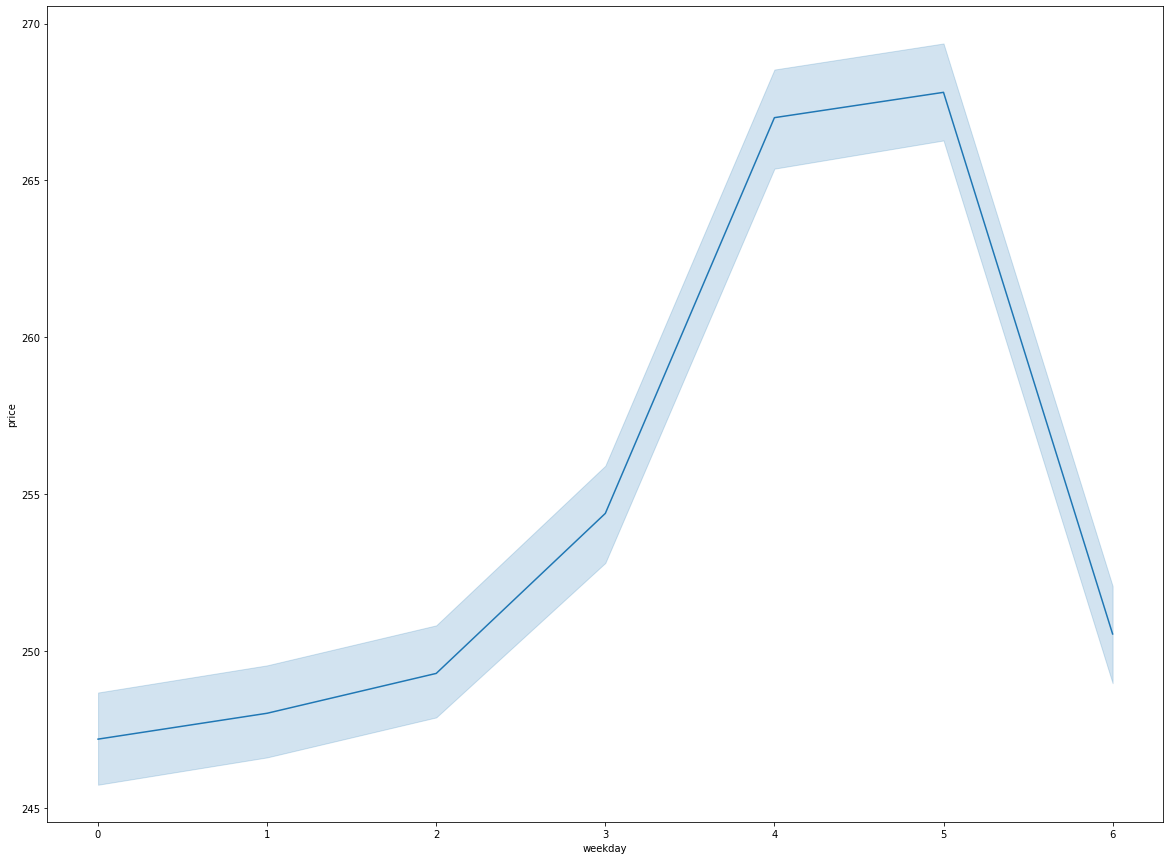

In [25]:
#creates weekday varible, plots price vs weekday
b_cal['weekday'] = b_cal['date'].apply(lambda x: x.weekday())#s_cal['date'].datetime.dayofweek
sns.lineplot(data=b_cal, x='weekday',y='price')

<AxesSubplot:xlabel='weekday', ylabel='avail'>

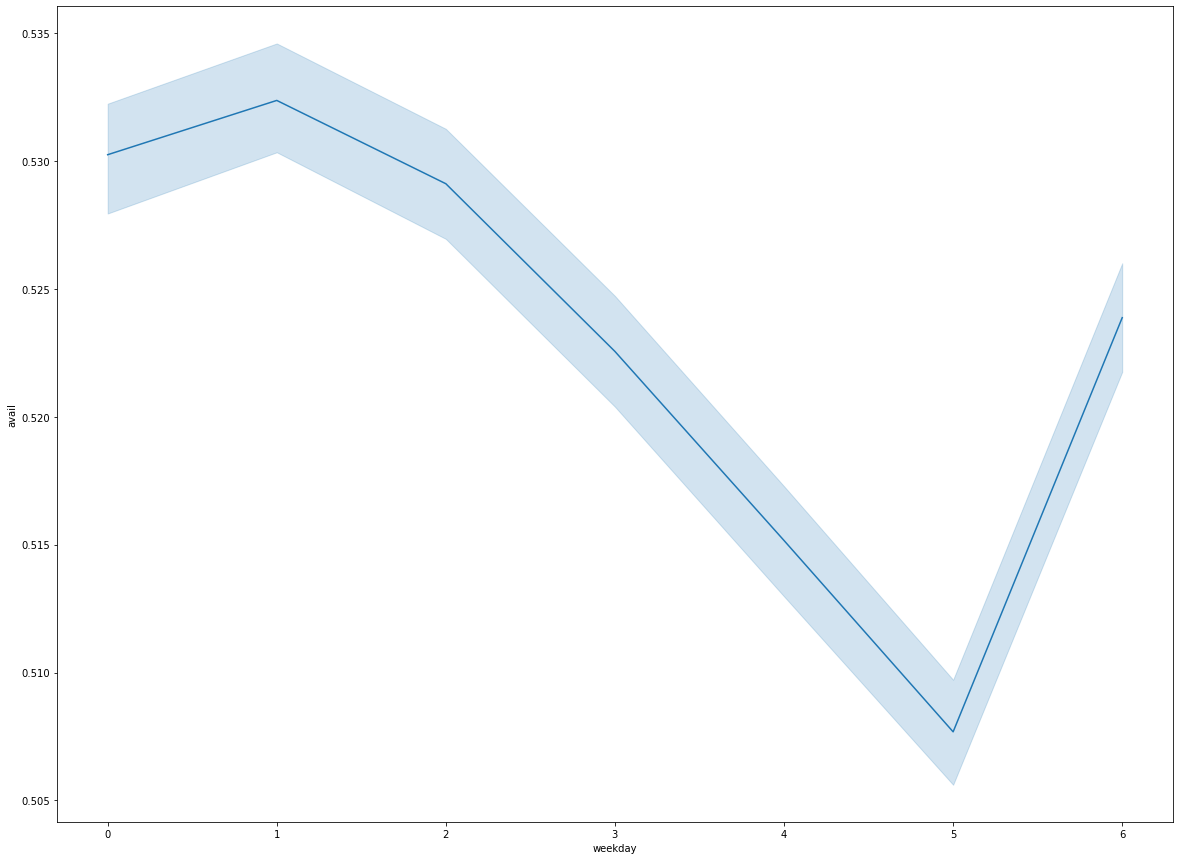

In [26]:

#plots availability vs weekday
sns.lineplot(data=b_cal, x='weekday',y='avail')

<AxesSubplot:xlabel='weekday', ylabel='price'>

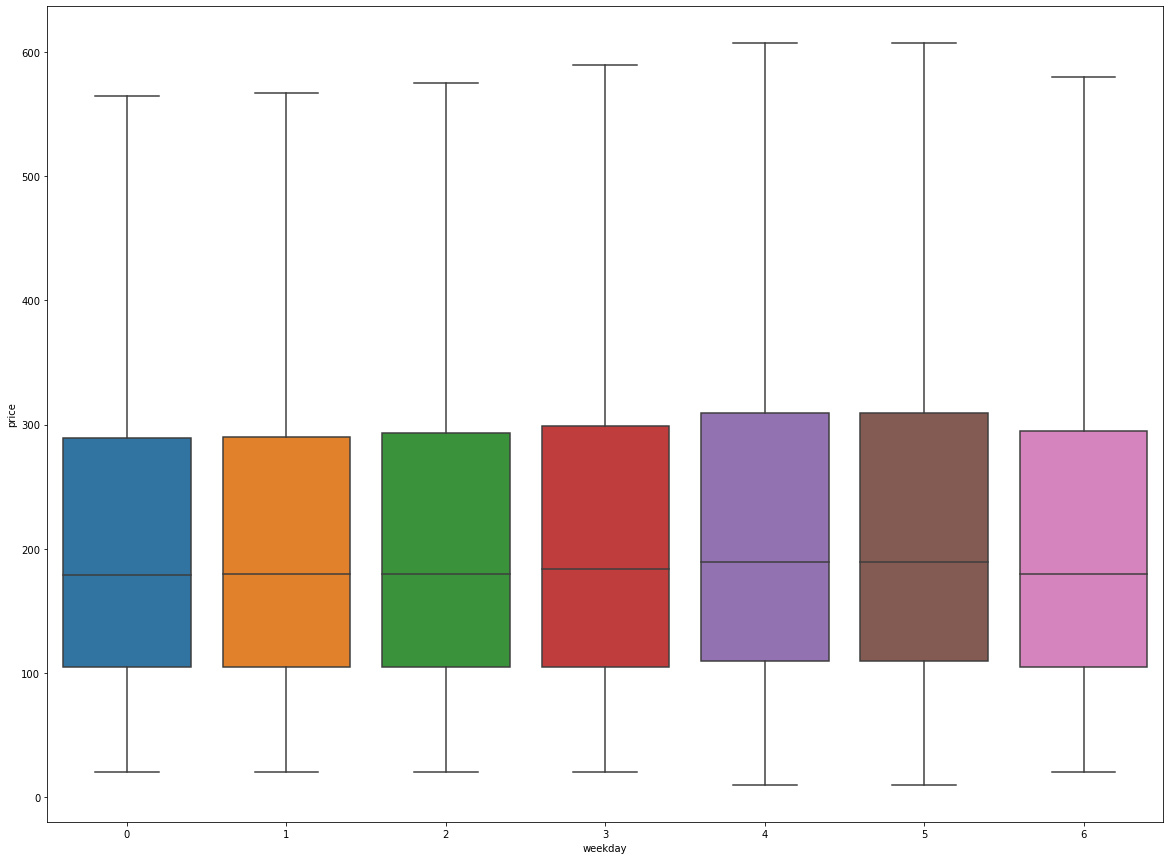

In [27]:
#BOX plots price vs weekday
sns.boxplot(data=b_cal, x='weekday',y='price',showfliers = False)
#plt.yscale('log')

<AxesSubplot:xlabel='month', ylabel='price'>

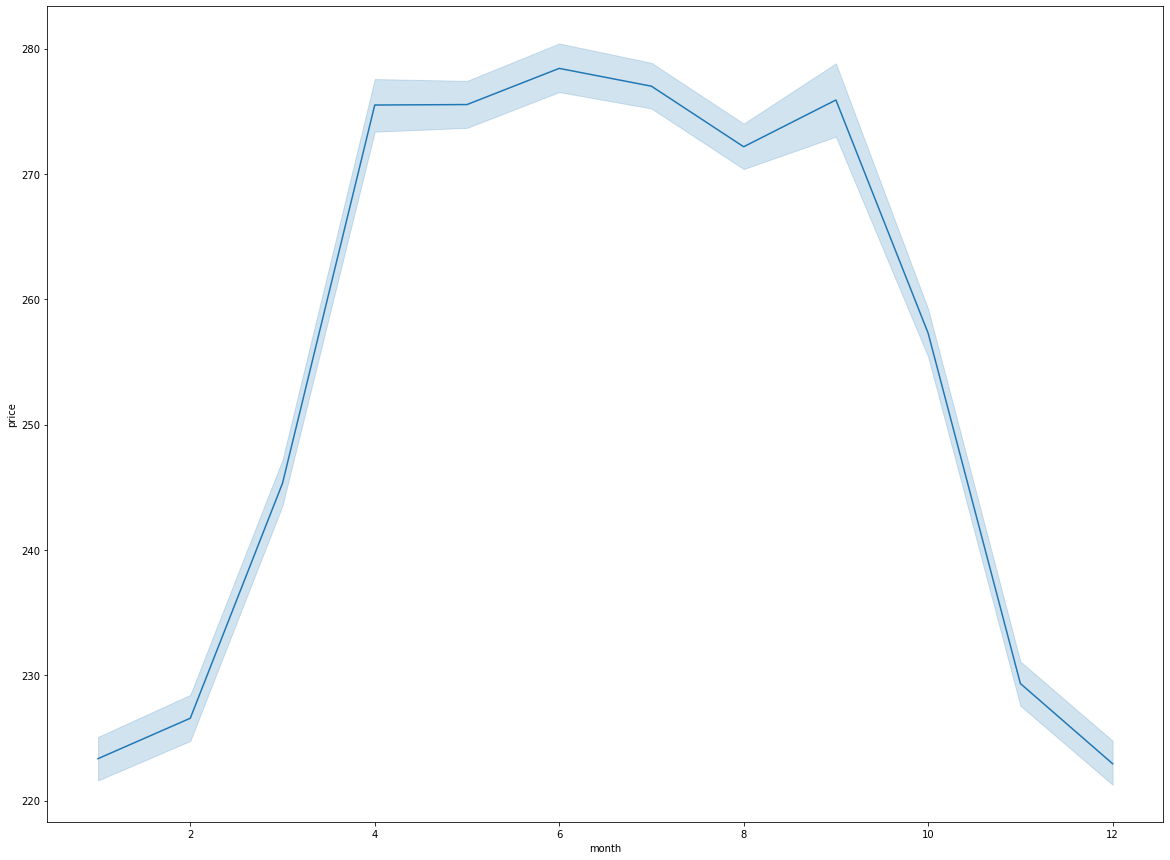

In [28]:
#creates month varible, plots price vs month

b_cal['month'] = b_cal['date'].apply(lambda x: x.month)#s_cal['date'].datetime.dayofweek
sns.lineplot(data=b_cal, x='month',y='price')

<AxesSubplot:xlabel='month', ylabel='price'>

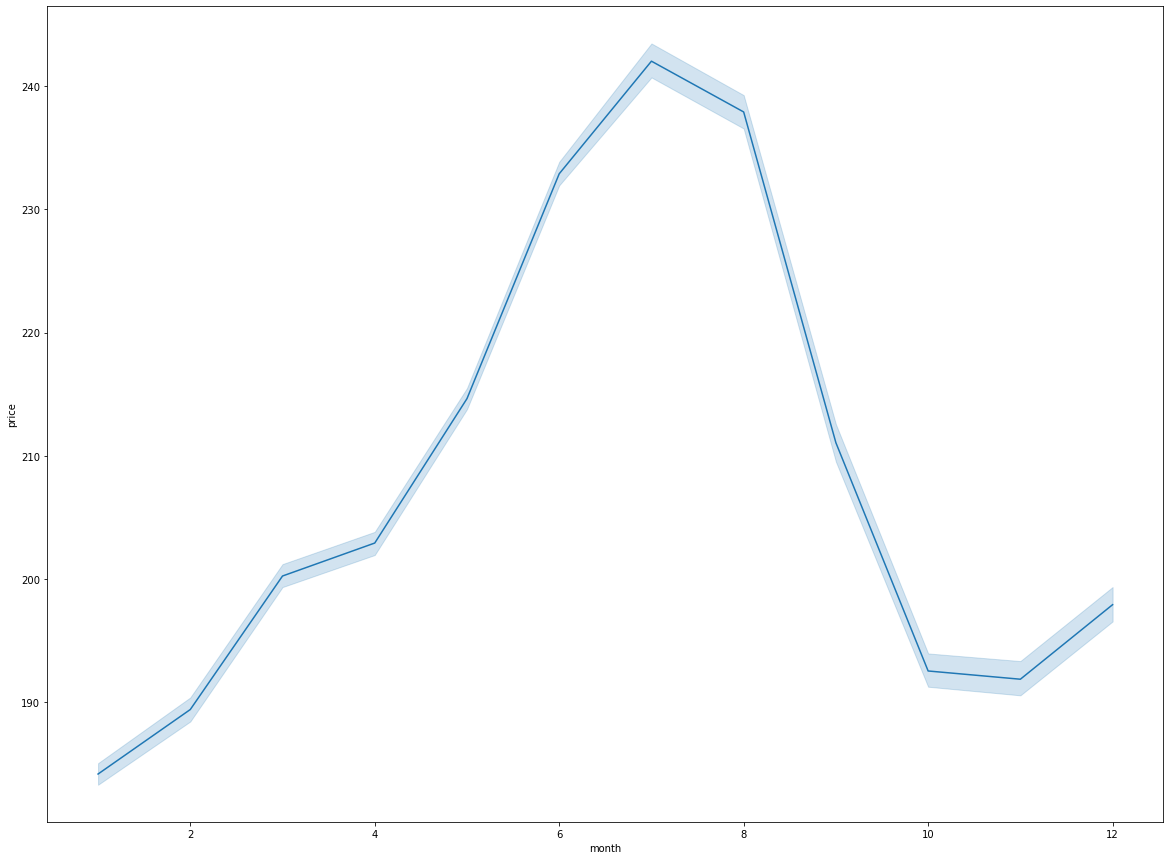

In [29]:
#creates month varible, plots price vs mponth
s_cal['month'] = s_cal['date'].apply(lambda x: x.month)#s_cal['date'].datetime.dayofweek
sns.lineplot(data=s_cal, x='month',y='price')

<AxesSubplot:xlabel='month', ylabel='price'>

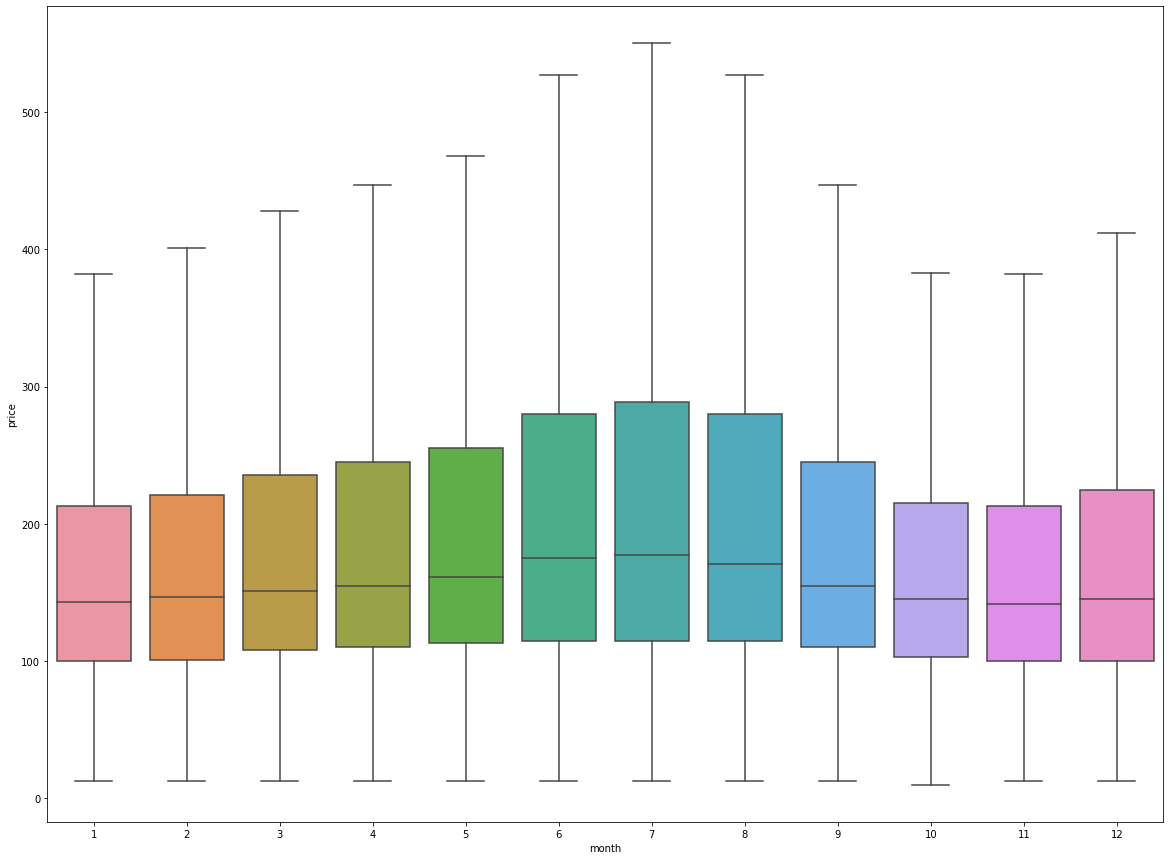

In [30]:
#BOX plots price vs month
sns.boxplot(data=s_cal, x='month',y='price',showfliers = False)

<AxesSubplot:xlabel='month', ylabel='price'>

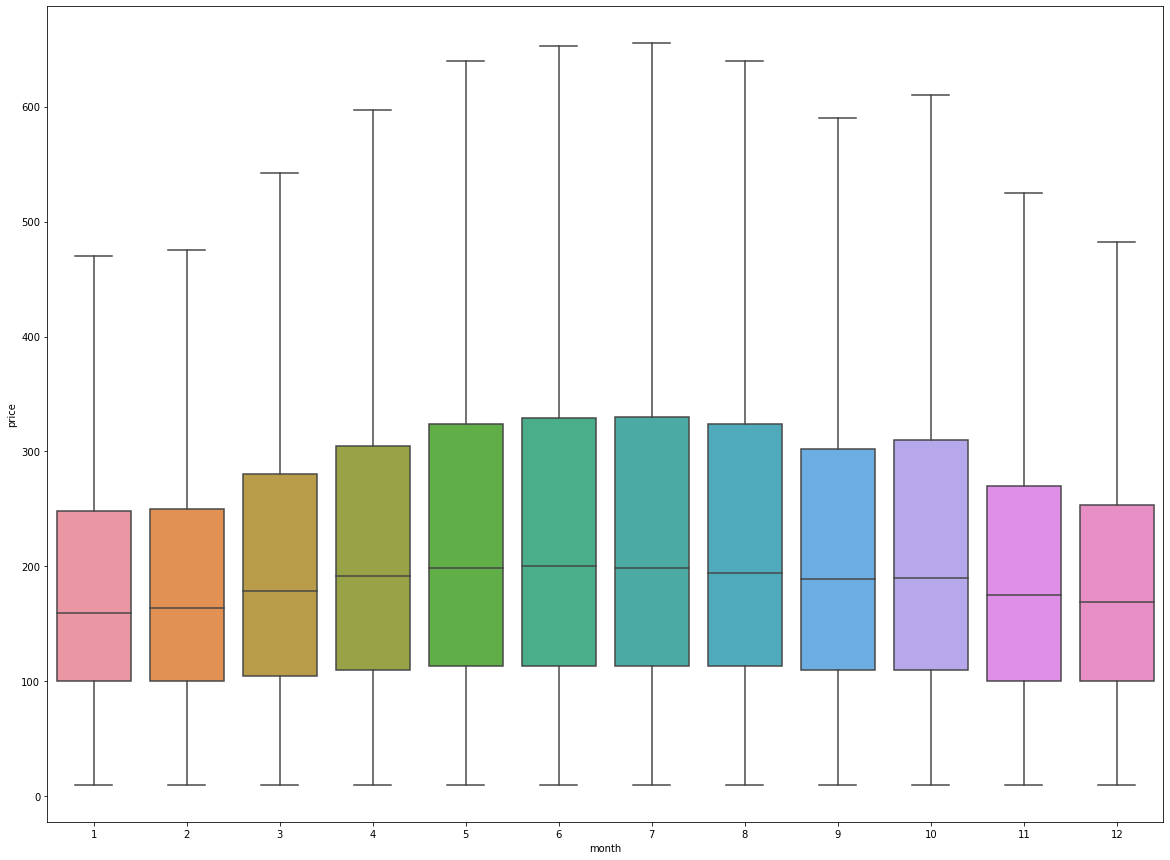

In [31]:
#BOX plots price vs month

sns.boxplot(data=b_cal, x='month',y='price',showfliers = False)

In [32]:
print(b_list.dtypes.to_string())

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

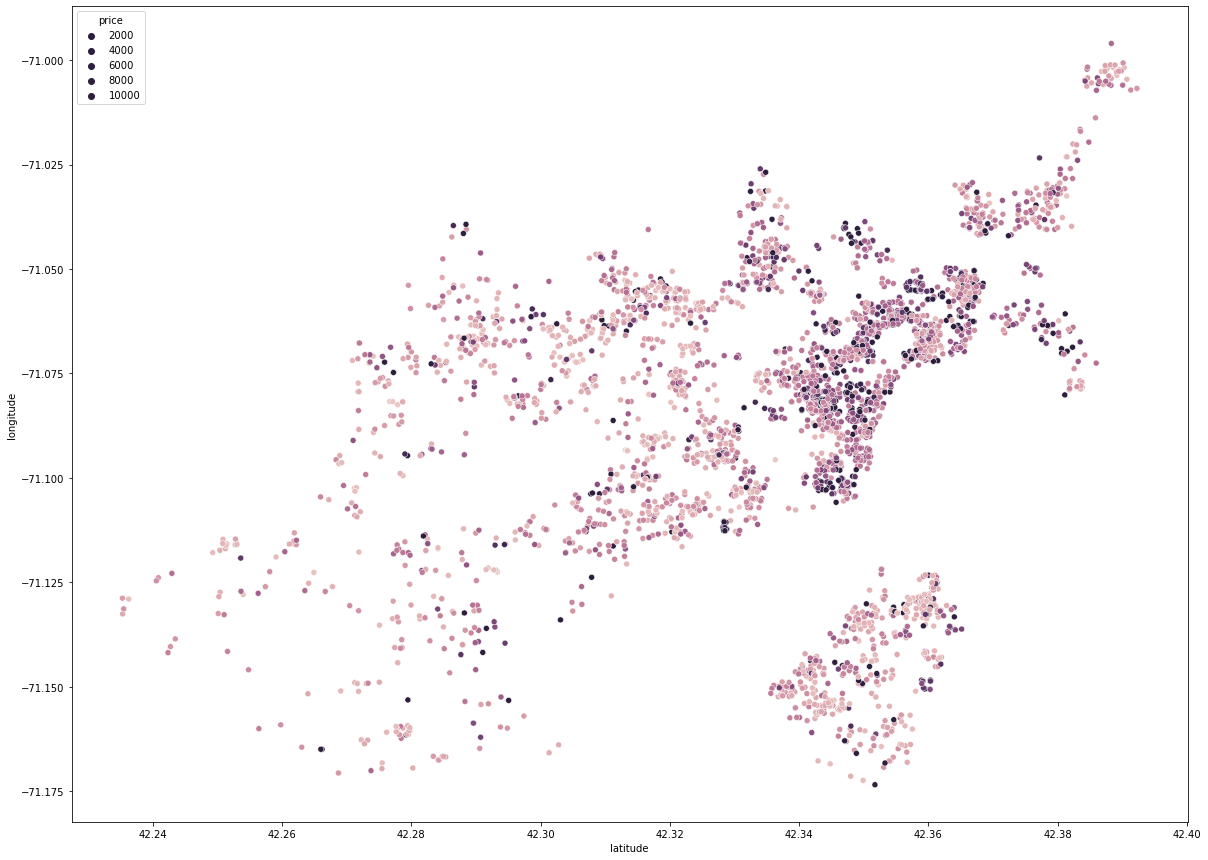

In [33]:
#phyical map of listings coloers by price

sns.scatterplot(data=b_list, x='latitude',y='longitude',hue='price', hue_norm=(0,500))

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

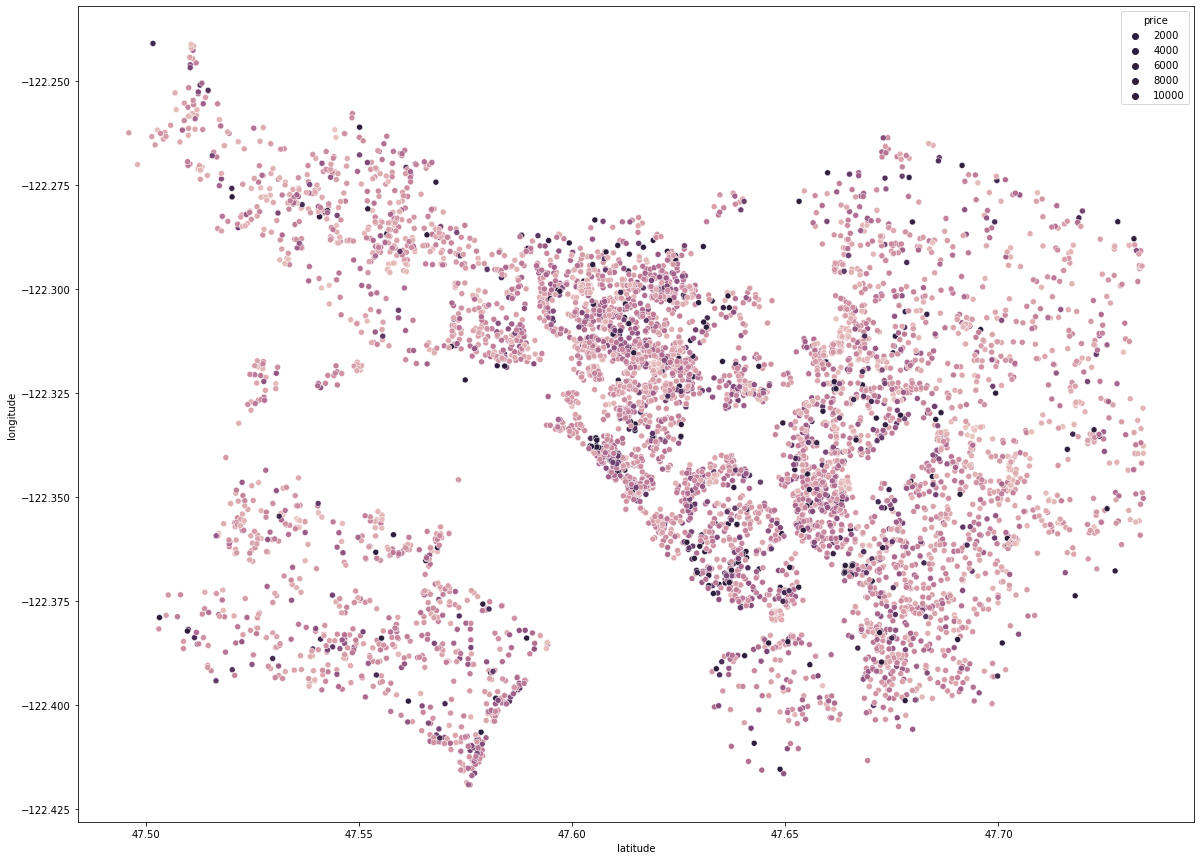

In [34]:
#phyical map of listings coloers by price
sns.scatterplot(data=s_list, x='latitude',y='longitude',hue='price', hue_norm=(0,500))

<AxesSubplot:>

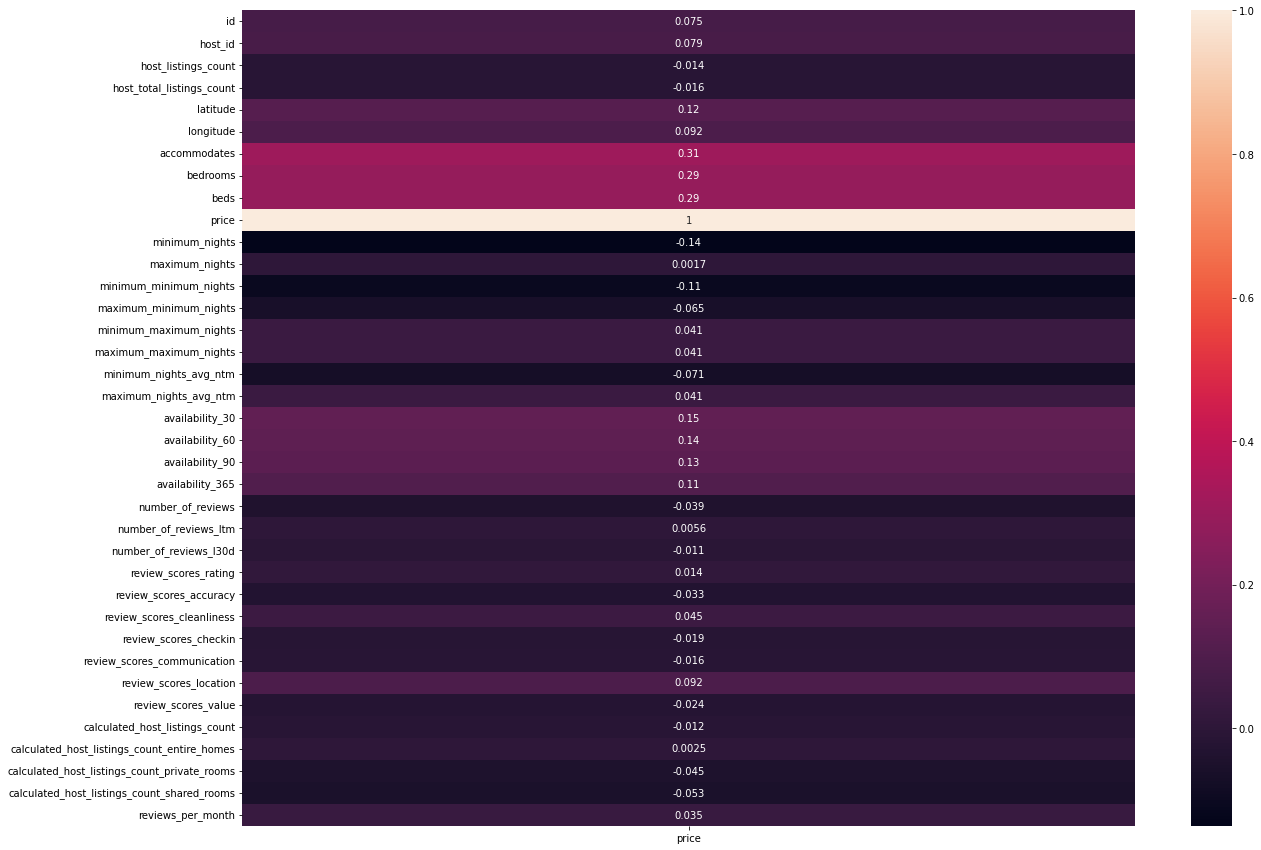

In [35]:
corr=b_list.corr().dropna(how='all').dropna(how='all', axis=1)
sns.heatmap(corr[['price']], annot=True)

<AxesSubplot:>

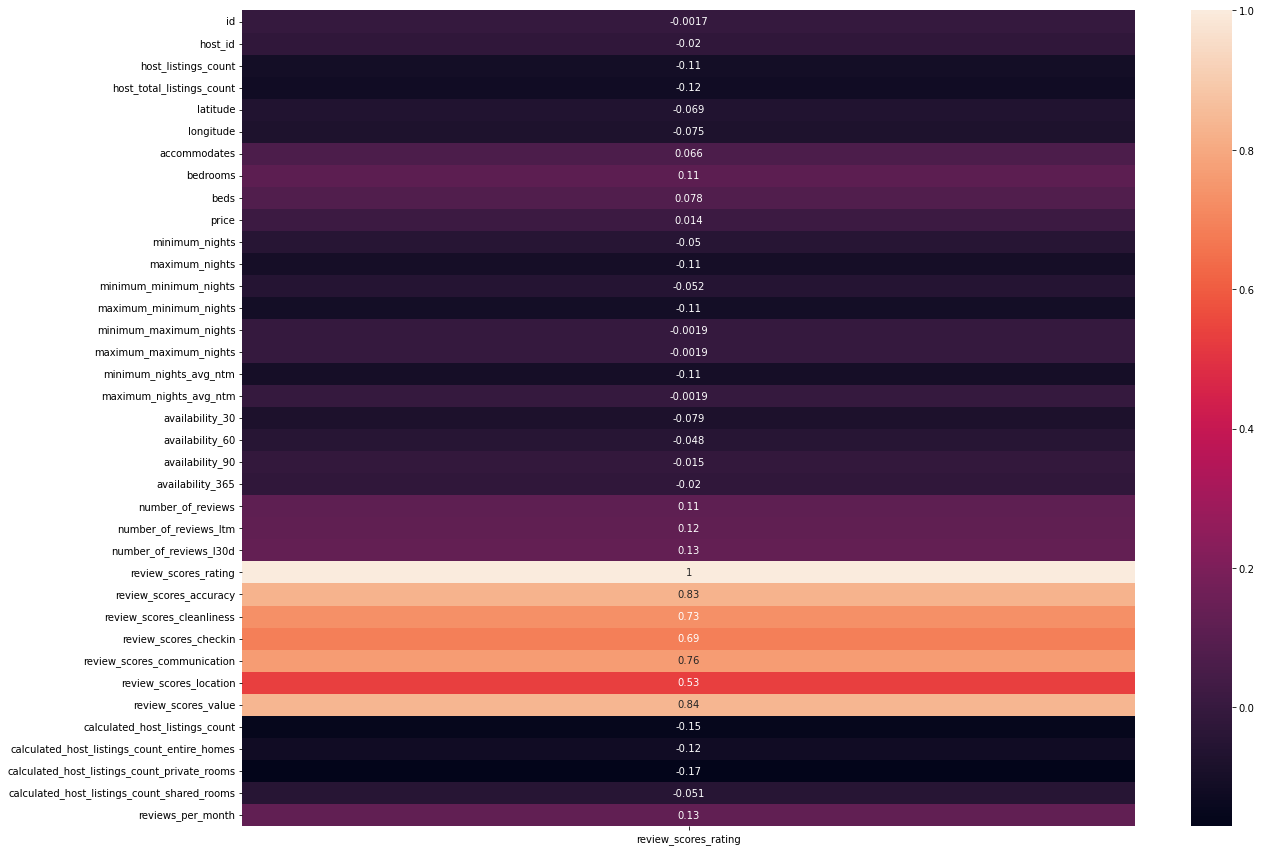

In [36]:
sns.heatmap(corr[['review_scores_rating']], annot=True)

<AxesSubplot:>

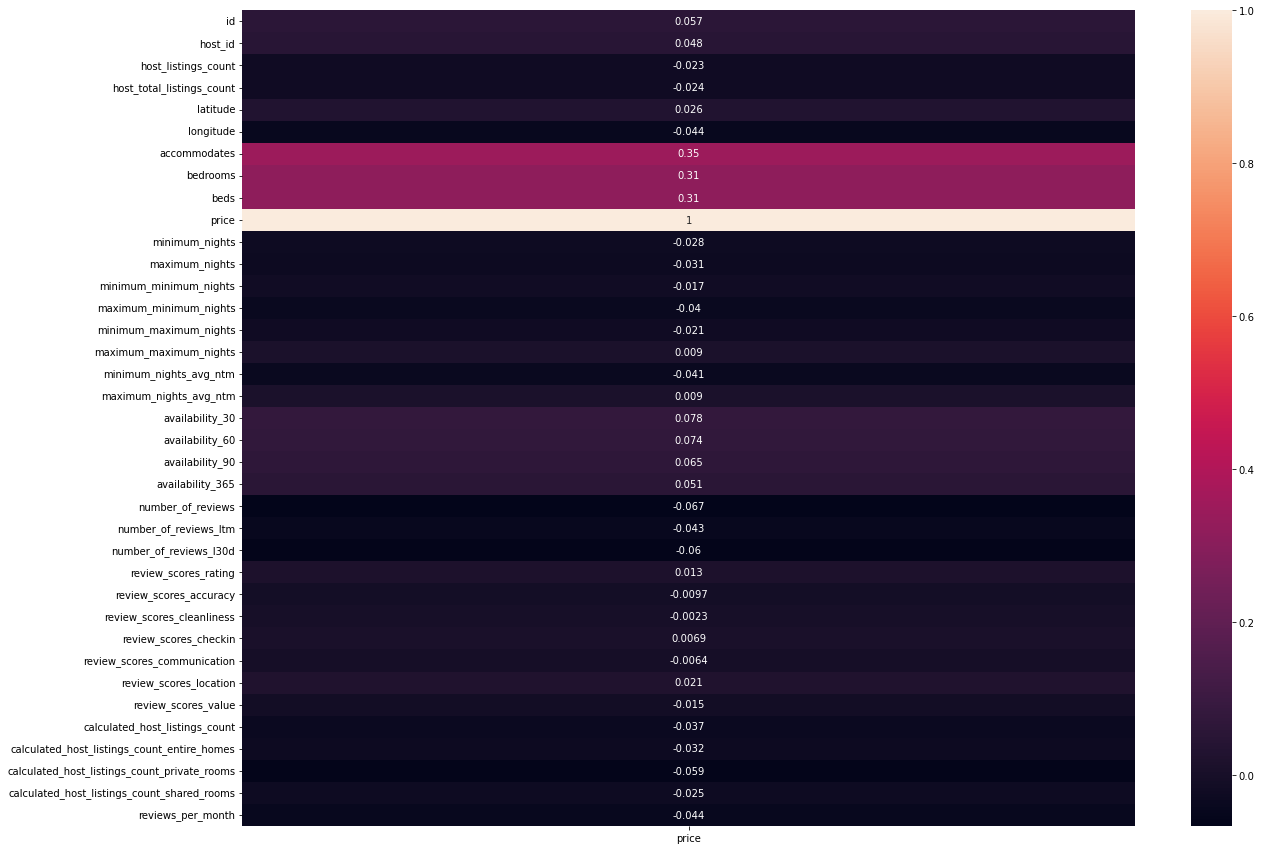

In [37]:
corr=s_list.corr().dropna(how='all').dropna(how='all', axis=1)
sns.heatmap(corr[['price']], annot=True)

<AxesSubplot:>

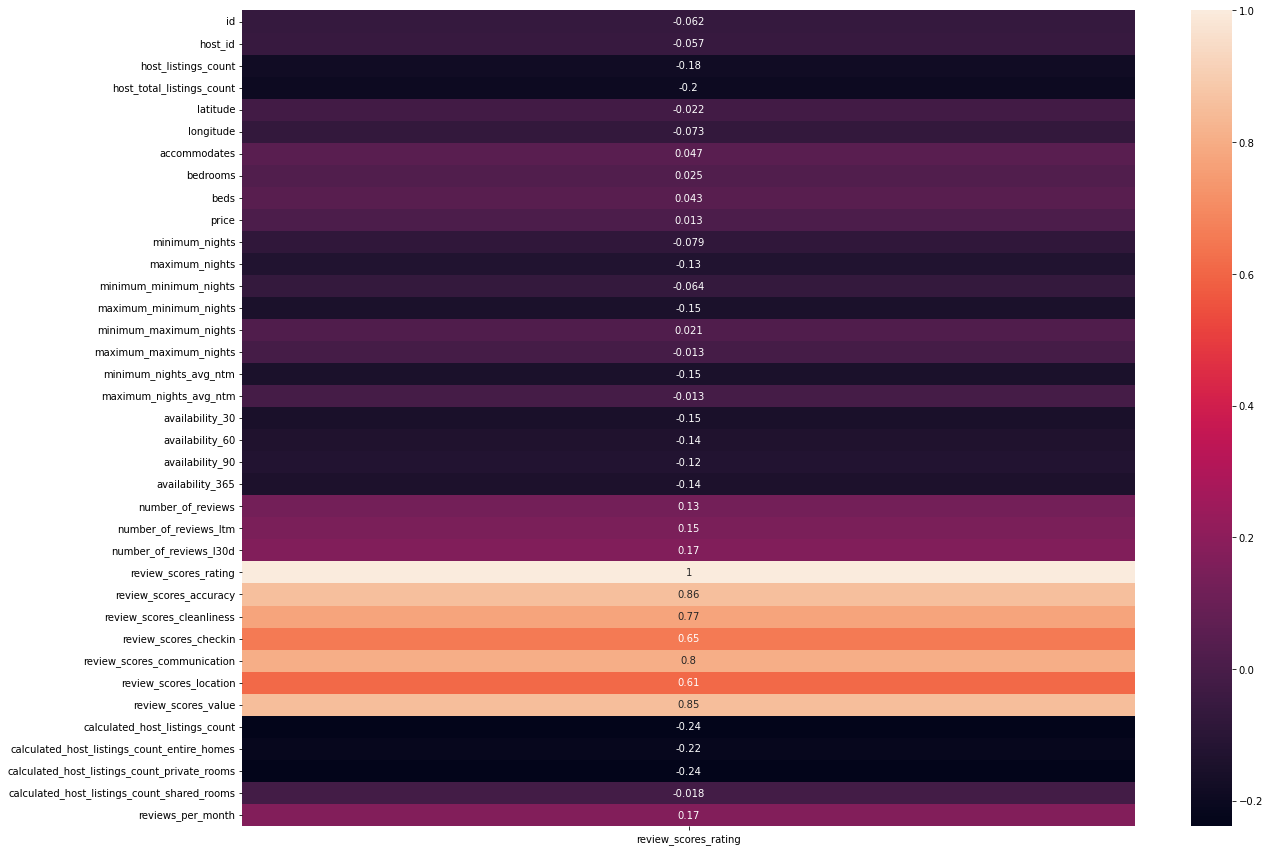

In [38]:
sns.heatmap(corr[['review_scores_rating']], annot=True)

In [109]:
# sns.histplot(data=s_list.groupby('id')['review_scores_rating','price'].mean().dropna(), x='price', hue='review_scores_rating', multiple="stack")

In [110]:
# sns.histplot(data=b_list.groupby('id')['review_scores_rating','price'].mean().dropna(), x='price', hue='review_scores_rating', multiple="stack")

In [111]:
print(b_rev.dtypes.to_string())

listing_id                int64
id                        int64
date             datetime64[ns]
reviewer_id               int64
reviewer_name            object
comments                 object


In [112]:
b_rev_list = b_rev.merge(b_list, left_on='listing_id', right_on='id')

In [113]:
s_rev_list = s_rev.merge(s_list, left_on='listing_id', right_on='id')

In [114]:
s_rev_list.head()

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,listing_url,scrape_id,last_scraped,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6606,5664,2009-07-17,18085,Vivian,"The Urban Cottage is comfortable, beautiful, f...",6606,https://www.airbnb.com/rooms/6606,20230918050357,2023-09-18,...,4.76,4.88,4.57,str-opli-19-002622,False,2,2,0,0,0.93
1,6606,338761,2011-06-27,434031,Elliott,Joyce was a wonderful host and the urban cotta...,6606,https://www.airbnb.com/rooms/6606,20230918050357,2023-09-18,...,4.76,4.88,4.57,str-opli-19-002622,False,2,2,0,0,0.93
2,6606,467904,2011-08-22,976182,Allegra,Beautiful cottage and warm hospitality from Jo...,6606,https://www.airbnb.com/rooms/6606,20230918050357,2023-09-18,...,4.76,4.88,4.57,str-opli-19-002622,False,2,2,0,0,0.93
3,6606,480017,2011-08-27,997921,Brittney,"Joyce is a wonderful host! She is warm, helpfu...",6606,https://www.airbnb.com/rooms/6606,20230918050357,2023-09-18,...,4.76,4.88,4.57,str-opli-19-002622,False,2,2,0,0,0.93
4,6606,487278,2011-08-30,206901,Pascal,Joyce's cottage is the perfect Seattle locatio...,6606,https://www.airbnb.com/rooms/6606,20230918050357,2023-09-18,...,4.76,4.88,4.57,str-opli-19-002622,False,2,2,0,0,0.93


<AxesSubplot:xlabel='date', ylabel='id_x'>

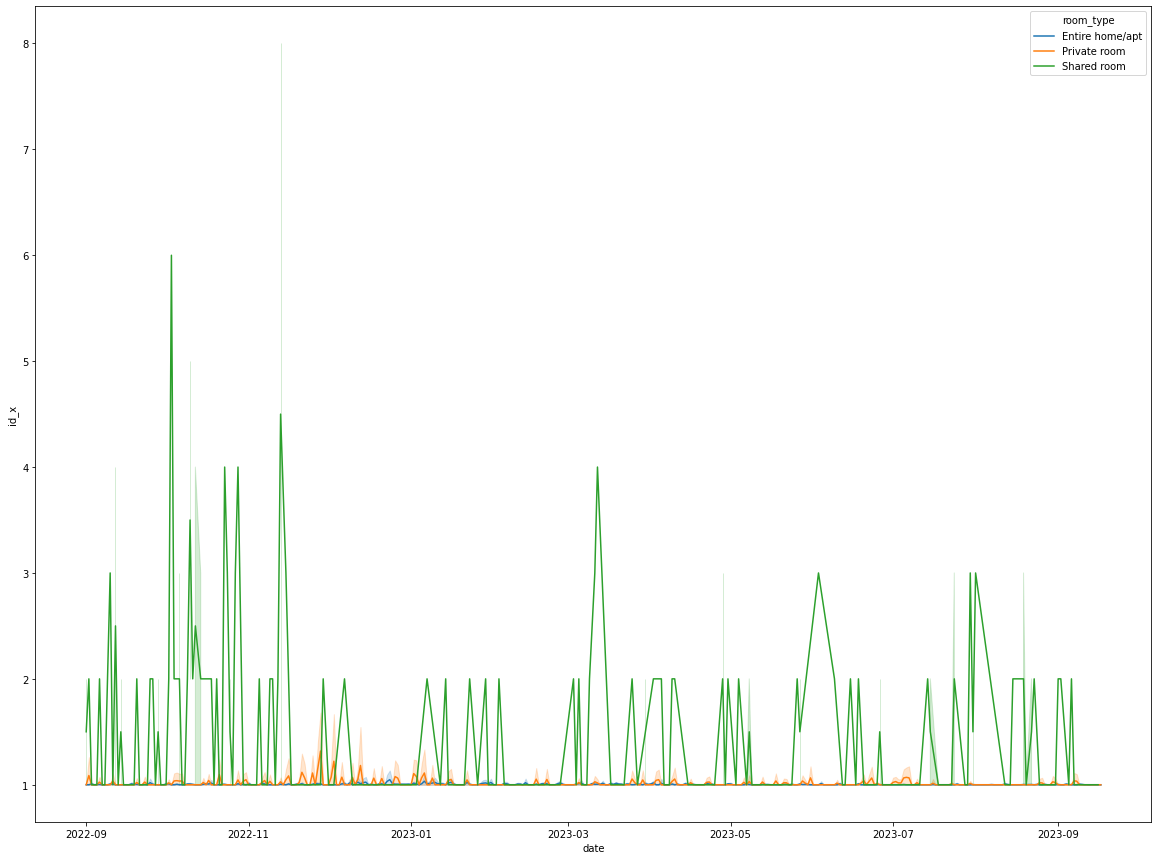

In [115]:
#make listing <> review datamfame (occupancy model setup), plot #reviews/date by room type 
s_m_full=s_rev_list#[s_rev_list['room_type']=='Entire home/apt']
s_m_full=s_m_full[s_m_full.date >= '09-01-2022']
s_m_full= s_m_full.groupby(['listing_id','date','room_type'], as_index=False)['id_x'].count()

s_m_full
sns.lineplot(data=s_m_full,x='date', y='id_x', hue='room_type')

<AxesSubplot:xlabel='date', ylabel='id_x'>

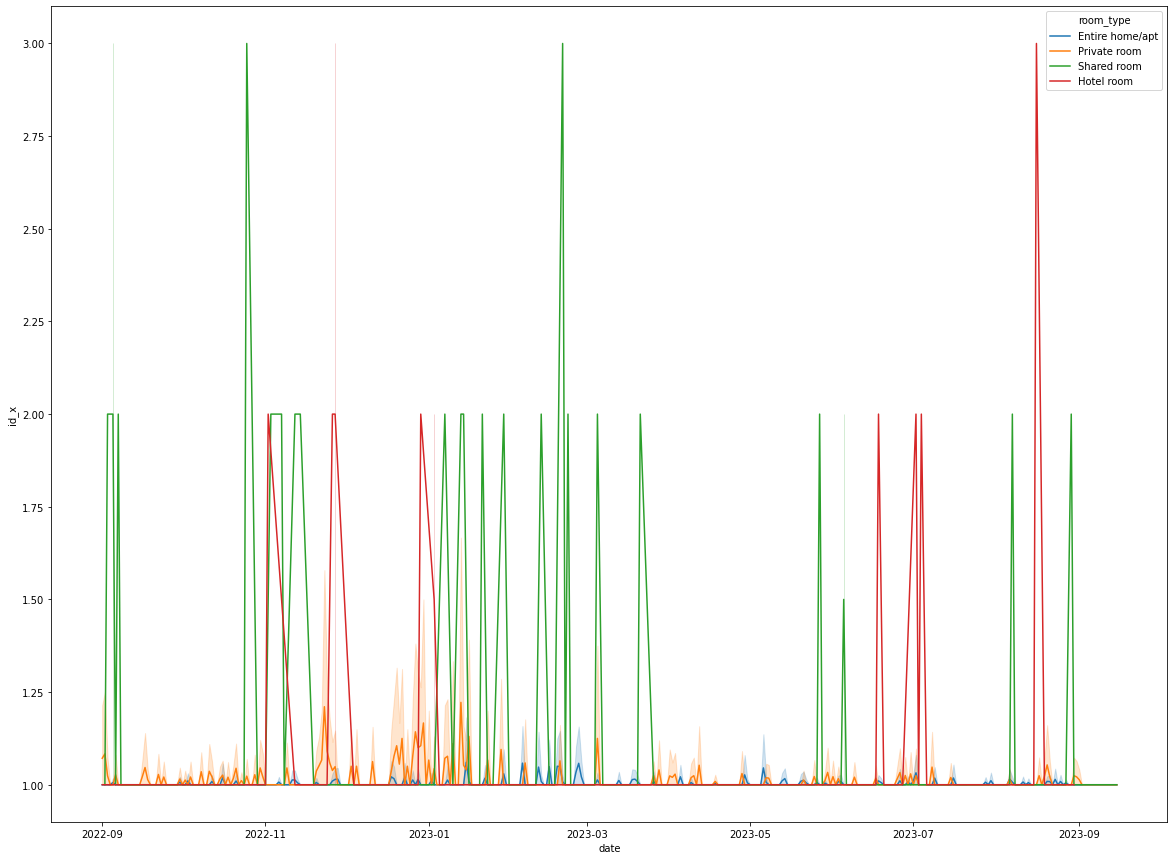

In [116]:
#make listing <> review datamfame (occupancy model setup), plot #reviews/date by room type 
b_m_full=b_rev_list#[s_rev_list['room_type']=='Entire home/apt']
b_m_full=b_m_full[b_m_full.date >= '09-01-2022']
b_m_full= b_m_full.groupby(['listing_id','date','room_type'], as_index=False)['id_x'].count()

b_m_full
sns.lineplot(data=b_m_full,x='date', y='id_x', hue='room_type')